Saving student_feedback.csv to student_feedback (1).csv
👉 Please upload your student_feedback.csv file


Saving student_feedback.csv to student_feedback (2).csv
✅ File Loaded Successfully
Dataset Shape: (1001, 10)

First 5 rows:


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9



📊 Average Ratings per Question:
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


/tmp/ipython-input-514785668.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="viridis")


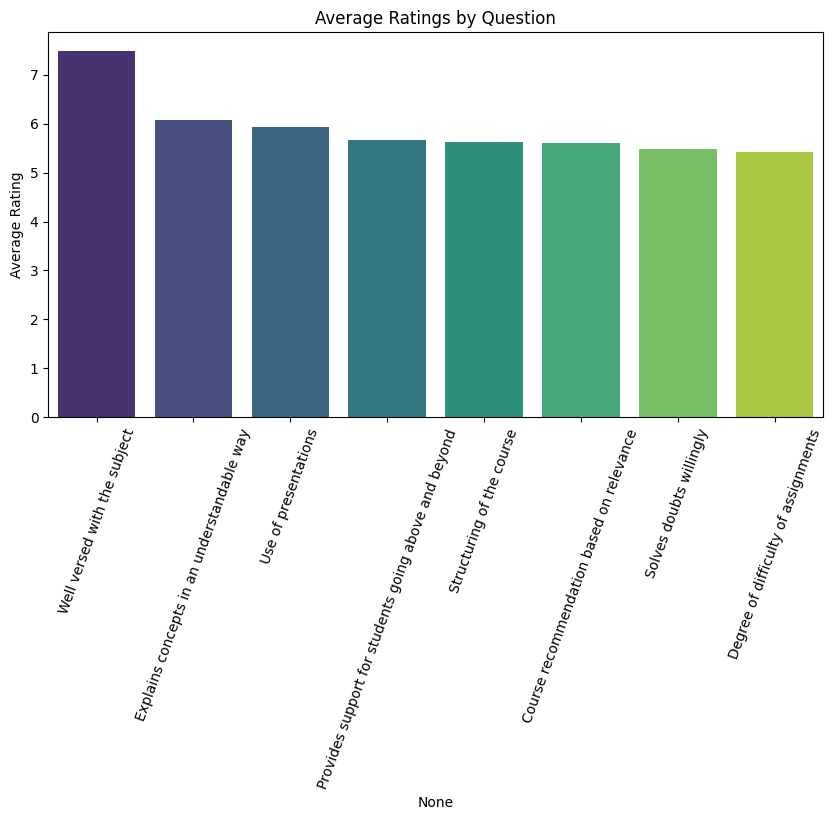

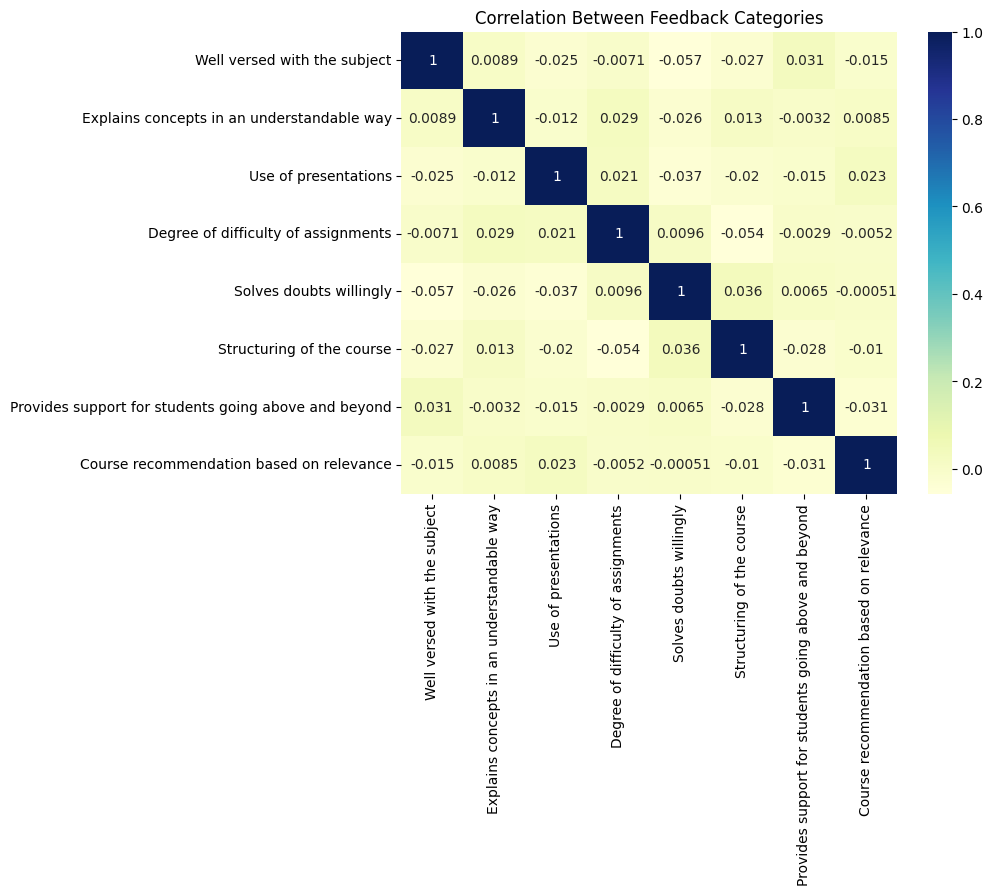


⚠️ No text feedback found. Adding demo feedback column for analysis...


ValueError: Length of values (1000) does not match length of index (1001)

In [2]:
from google.colab import files
import pandas as pd

# Upload your CSV
uploaded = files.upload()

# Load it into pandas
df = pd.read_csv("student_feedback.csv")
df.head()

# ==============================
# 📊 College Event Feedback Analysis
# Internship Project - Task 3
# ==============================

# 1. Import Libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# 2. Upload & Load CSV
print("👉 Please upload your student_feedback.csv file")
uploaded = files.upload()

df = pd.read_csv("student_feedback.csv")
print("✅ File Loaded Successfully")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# 3. Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 4. Ratings Analysis
print("\n📊 Average Ratings per Question:")
avg_ratings = df.drop(columns=['Student ID'], errors='ignore').mean().sort_values(ascending=False)
print(avg_ratings)

# --- Visualization: Average ratings ---
plt.figure(figsize=(10,5))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="viridis")
plt.xticks(rotation=70)
plt.title("Average Ratings by Question")
plt.ylabel("Average Rating")
plt.show()

# --- Heatmap of all ratings ---
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Student ID'], errors='ignore').corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Feedback Categories")
plt.show()

# 5. Add Text Feedback Column (if missing)
if "Feedback Comment" not in df.columns:
    print("\n⚠️ No text feedback found. Adding demo feedback column for analysis...")
    demo_comments = [
        "The teacher explained well",
        "Too much theory, less practicals",
        "Great use of presentations",
        "Assignments were very difficult",
        "Supportive and helpful"
    ]
    df['Feedback Comment'] = demo_comments * (len(df)//len(demo_comments))

# 6. Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0: return "Positive"
    elif polarity == 0: return "Neutral"
    else: return "Negative"

df['Sentiment'] = df['Feedback Comment'].apply(get_sentiment)

print("\n📌 Sentiment Counts:")
print(df['Sentiment'].value_counts())

# --- Visualization: Sentiment distribution ---
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green','blue','red'])
plt.title("Sentiment Distribution of Comments")
plt.ylabel("Count")
plt.show()

# 7. Word Cloud (for common feedback words)
text = " ".join(df['Feedback Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Feedback Words")
plt.show()

# 8. Summary Outputs
print("\n✅ FINAL SUMMARY REPORT")
print("- Strongest areas:", avg_ratings.head(3).index.tolist())
print("- Weakest areas:", avg_ratings.tail(3).index.tolist())
print("- Sentiment split:", df['Sentiment'].value_counts(normalize=True).round(2)*100, "%")
